In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/train/combined_data.csv")
df.sample(5)

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ,label
146520,-0.167,-0.068,-0.944,-25.330,-25.208,67.444,176.006,3.224,163.070,walking
27860,0.869,-0.059,-0.698,12.512,-5.493,-1.526,-170.013,-49.933,117.647,climbing
113918,-0.690,0.113,-0.732,0.061,-3.479,-0.977,170.046,42.880,28.773,sitting
19512,-0.562,-0.172,-0.824,4.150,1.099,3.601,-172.211,33.157,-44.363,climbing
145268,-0.394,0.298,-1.108,-2.563,-56.152,-2.319,-176.627,27.285,-11.360,walking


In [3]:
df.shape

(170260, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170260 entries, 0 to 170259
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ax      170260 non-null  float64
 1   ay      170260 non-null  float64
 2   az      170260 non-null  float64
 3   wx      170260 non-null  float64
 4   wy      170260 non-null  float64
 5   wz      170260 non-null  float64
 6   AngleX  170260 non-null  float64
 7   AngleY  170260 non-null  float64
 8   AngleZ  170260 non-null  float64
 9   label   170260 non-null  object 
dtypes: float64(9), object(1)
memory usage: 13.0+ MB


In [5]:
df.describe()

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ
count,170260.000000,170260.000000,170260.000000,170260.000000,170260.000000,170260.000000,170260.000000,170260.000000,170260.000000
mean,-0.212845,0.092447,-0.880495,-0.888306,-0.676773,-0.120438,94.730543,14.866423,-13.224977
std,0.553140,0.282003,0.597359,49.965501,65.428640,64.166753,140.125893,25.576858,86.487866
min,-12.522000,-11.078000,-15.465000,-614.380000,-686.646000,-490.479000,-179.995000,-69.911000,-179.995000
25%,-0.655000,-0.022000,-0.987000,-11.719000,-12.085000,-13.733000,160.999000,-4.170500,-82.497500
50%,-0.112000,0.126000,-0.891000,-0.305000,0.122000,0.305000,167.673000,14.683000,-18.913000
75%,0.134000,0.251000,-0.625000,5.737000,6.042000,9.399000,170.497000,35.404500,45.940500
max,9.617000,6.222000,15.990000,513.916000,873.108000,788.513000,179.995000,89.418000,179.995000


In [6]:
df.isnull().sum()

ax        0
ay        0
az        0
wx        0
wy        0
wz        0
AngleX    0
AngleY    0
AngleZ    0
label     0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df["label"].value_counts()

label
lying       42399
sitting     35999
running     32899
walking     29999
climbing    28964
Name: count, dtype: int64

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df.sample(5)

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ,label
24838,-0.104,-0.066,-0.983,-65.735,19.775,-165.833,-175.045,7.405,-53.773,climbing
2300,-0.550,-0.260,-0.622,-53.894,78.857,-32.410,-166.761,36.788,-57.508,climbing
80531,-0.202,-0.061,-0.712,53.040,-80.566,-46.692,-172.947,11.607,40.309,running
18511,-0.727,-0.017,-0.681,-64.087,-2.319,-57.739,-157.599,37.145,150.189,climbing
3665,-1.178,0.098,-0.271,101.379,436.401,10.681,174.957,26.647,-142.855,climbing


Data Analysis


In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Step 2: Summary statistics
print(df.describe())

                  ax             ay             az             wx  \
count  170260.000000  170260.000000  170260.000000  170260.000000   
mean       -0.212845       0.092447      -0.880495      -0.888306   
std         0.553140       0.282003       0.597359      49.965501   
min       -12.522000     -11.078000     -15.465000    -614.380000   
25%        -0.655000      -0.022000      -0.987000     -11.719000   
50%        -0.112000       0.126000      -0.891000      -0.305000   
75%         0.134000       0.251000      -0.625000       5.737000   
max         9.617000       6.222000      15.990000     513.916000   

                  wy             wz         AngleX         AngleY  \
count  170260.000000  170260.000000  170260.000000  170260.000000   
mean       -0.676773      -0.120438      94.730543      14.866423   
std        65.428640      64.166753     140.125893      25.576858   
min      -686.646000    -490.479000    -179.995000     -69.911000   
25%       -12.085000     -13.7330

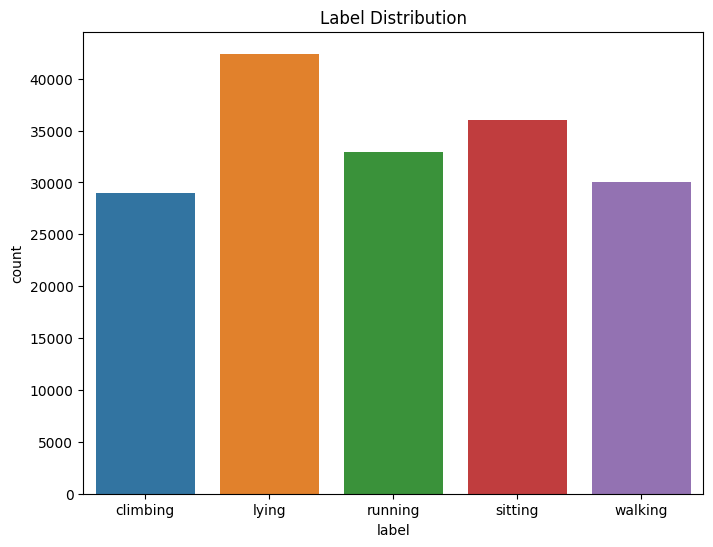

In [13]:
# Step 3: Visualize the label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.show()

In [14]:
# Step 4: Pairwise scatter plot for numerical variables
sns.pairplot(df, hue='label', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plot', y=1.02)
plt.show()

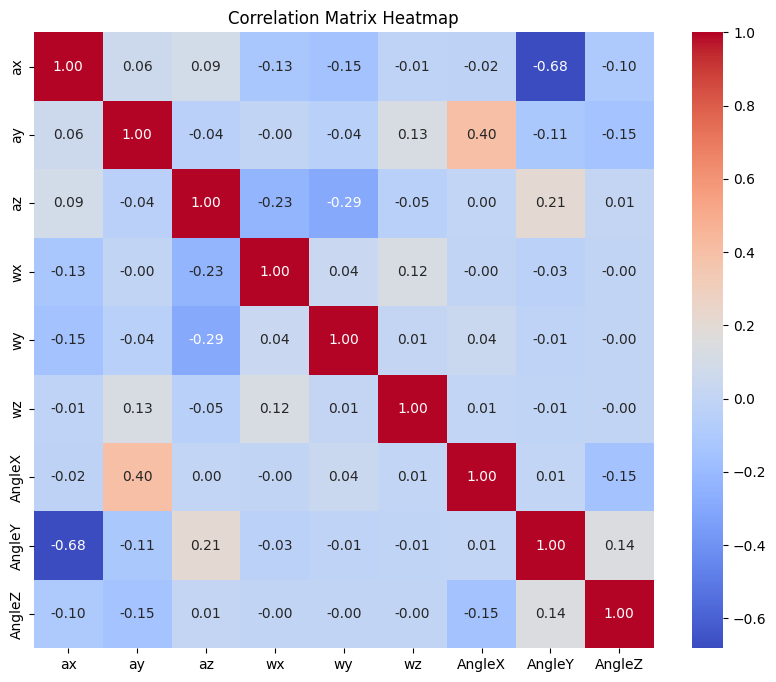

In [ ]:
# Step 5: Correlation matrix heatmap
correlation_matrix = df[["ax", "ay", "az", "wx",
                         "wy",	"wz",	"AngleX",	"AngleY",	"AngleZ"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

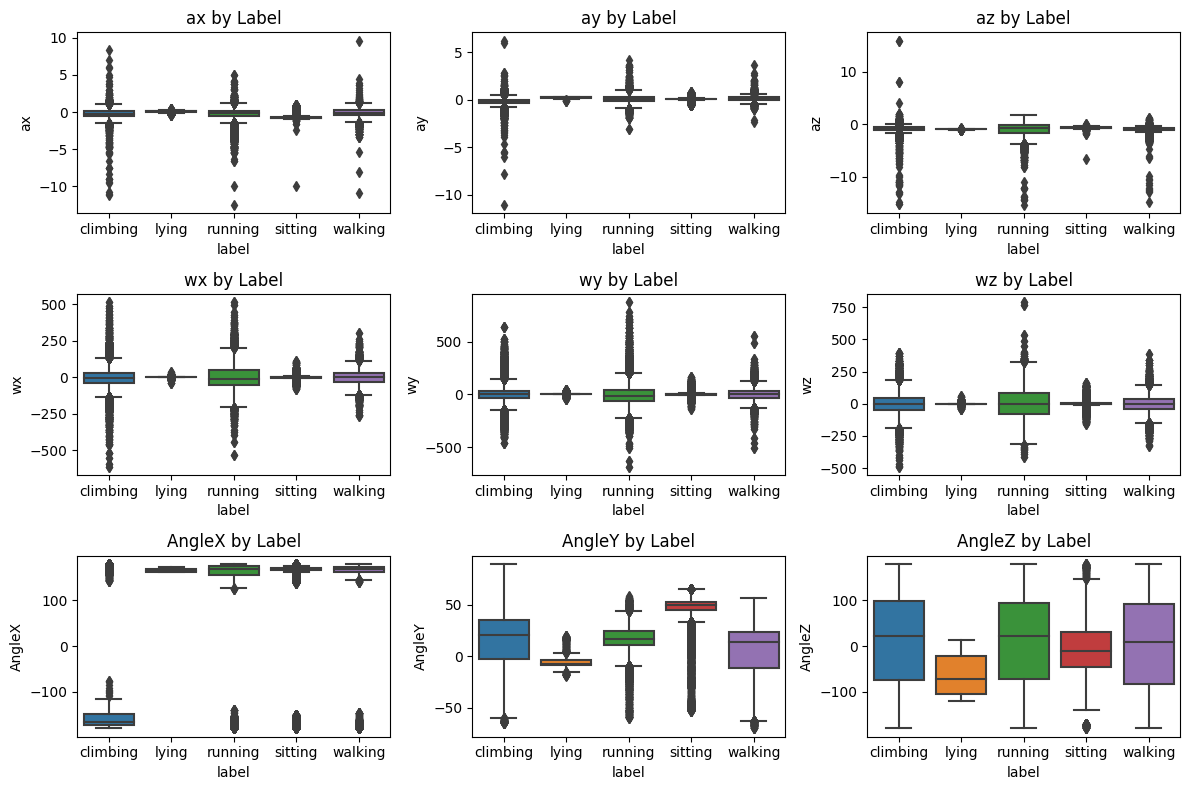

In [ ]:
# Step 6: Box plot for each feature based on the label
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'{col} by Label')
plt.tight_layout()
plt.show()

<Axes: >

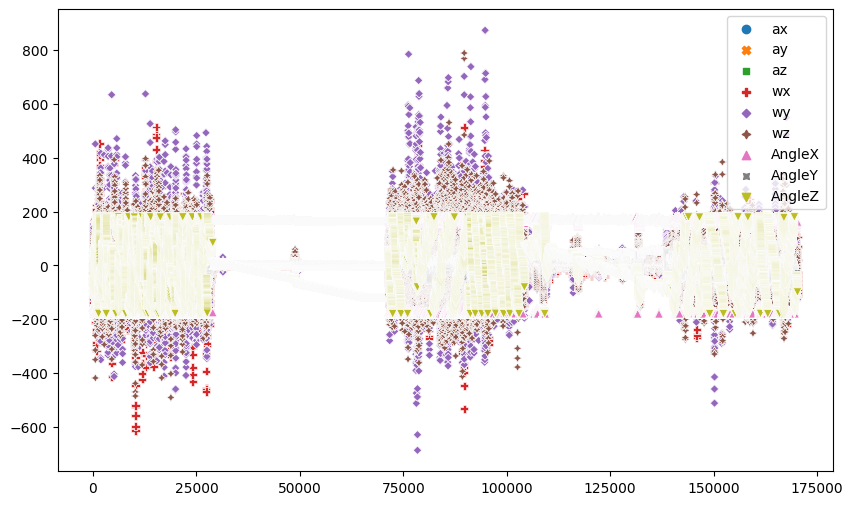

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df)

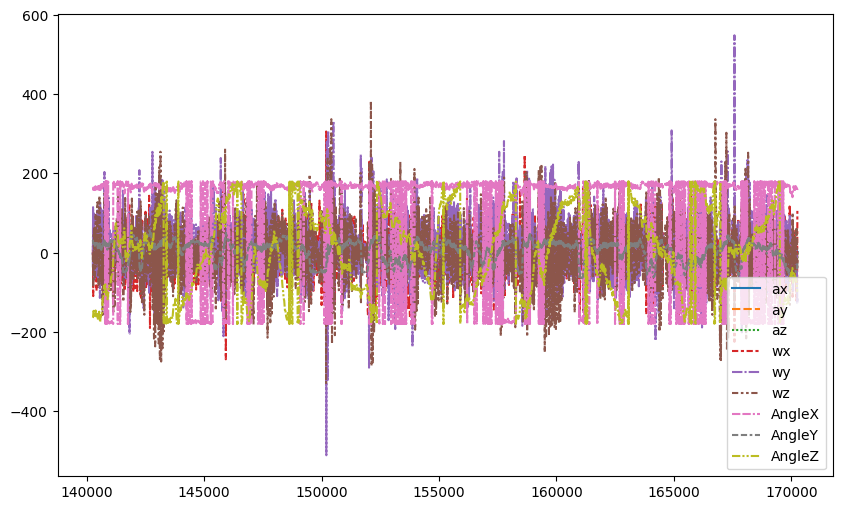

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df["label"] == "walking"])

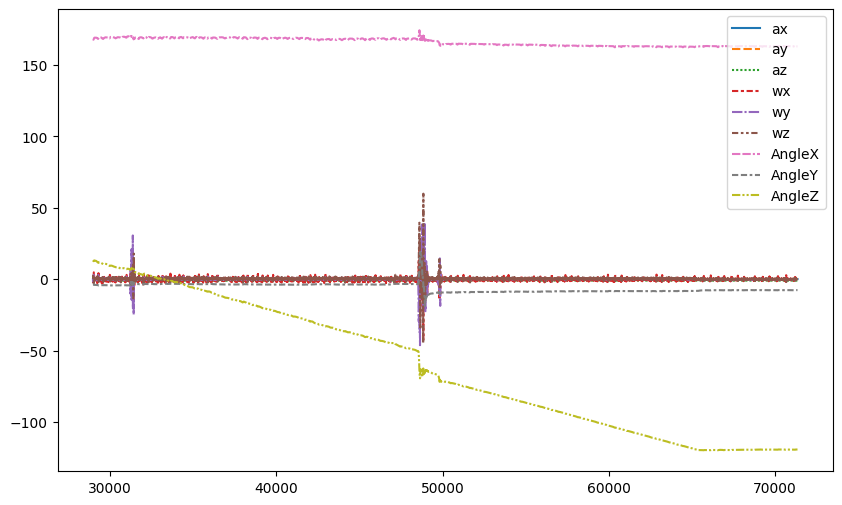

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df["label"] == "lying"])

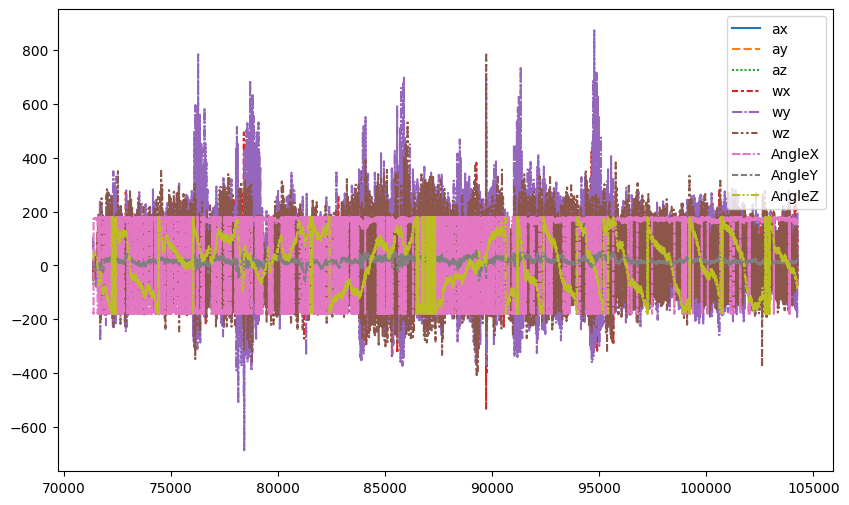

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df["label"] == "running"])

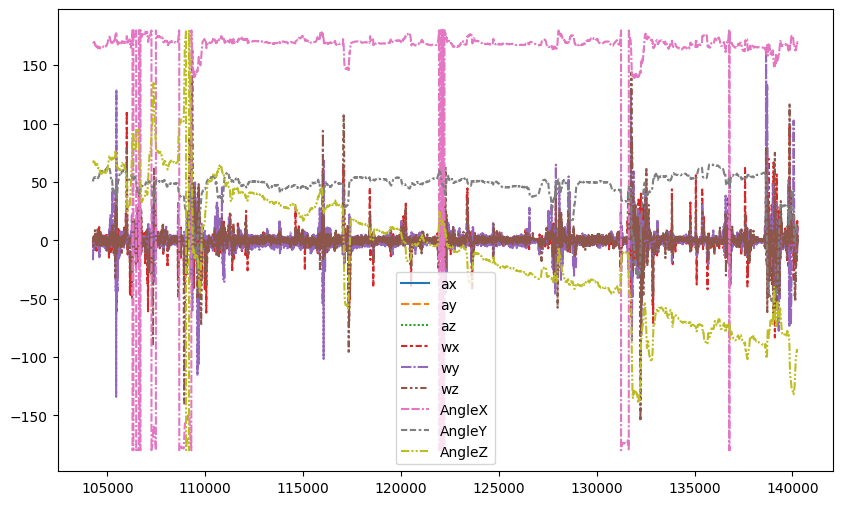

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df["label"] == "sitting"])

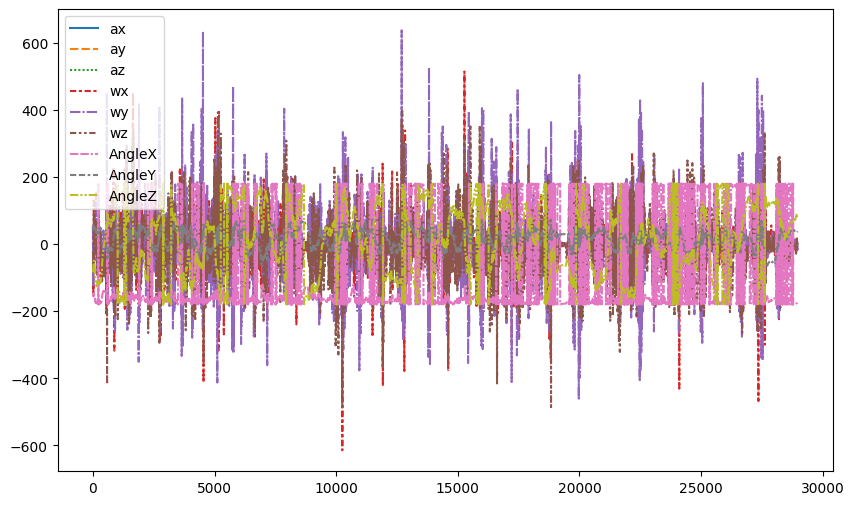

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df["label"] == "climbing"])

Data Preprocessing

In [13]:
X = df.iloc[:, :-1]
y = df['label']

In [14]:
X.columns

Index(['ax', 'ay', 'az', 'wx', 'wy', 'wz', 'AngleX', 'AngleY', 'AngleZ'], dtype='object')

In [15]:
X.shape

(170260, 9)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ
0,-1.115733,-0.661155,0.606831,1.018232,0.856444,-0.347215,-1.743541,1.107511,-0.820372
1,-1.115733,-0.845551,0.677140,0.491747,0.717452,-0.391926,-1.742606,1.088588,-0.818915
2,-1.157314,-0.845551,0.677140,0.491747,0.717452,-0.391926,-1.741700,1.069899,-0.817516
3,-1.157314,-1.214343,0.747450,-0.067721,0.427334,-0.418560,-1.742057,1.057466,-0.814337
4,-1.251323,-1.214343,0.747450,-0.067721,0.427334,-0.418560,-1.742406,1.045424,-0.811226


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Dropout, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [18]:
df.columns

Index(['ax', 'ay', 'az', 'wx', 'wy', 'wz', 'AngleX', 'AngleY', 'AngleZ',
       'label'],
      dtype='object')

In [19]:
# Extracting features and labels
X = X_scaled_df[['ax', 'ay', 'az', 'wx', 'wy',
                 'wz', 'AngleX', 'AngleY', 'AngleZ']].values
y = df['label'].values

# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Sliding window parameters
window_size = 128  # Adjust as needed
stride = 16  # Adjust as needed

# Generate sequences using sliding windows
sequences = []
labels = []

for i in range(0, len(X) - window_size + 1, stride):
    window = X[i:i+window_size]
    label = y_categorical[i+window_size-1]
    if len(window) == window_size:
        sequences.append(window)
        labels.append(label)


X_sliding = np.array(sequences)
y_sliding = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    X_sliding, y_sliding, test_size=0.2, random_state=42, shuffle=True)

Model Training

In [20]:
# Build the CNN model
model = Sequential()

model.add(Conv1D(128, kernel_size=3, activation='relu',
          input_shape=(window_size, X_scaled.shape[1])))
model.add(MaxPooling1D(pool_size=2, padding="valid"))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding="valid"))

model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding="valid"))

model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding="valid"))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [21]:
from tensorflow.keras.optimizers import Adam, SGD
# Compile the model
custom_learning_rate = 0.01
custom_optimizer = Adam(learning_rate=custom_learning_rate)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=250,
                    validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/250
266/266 [==============================] - 7s 21ms/step - loss: 0.5495 - accuracy: 0.8131 - val_loss: 0.3899 - val_accuracy: 0.8712
Epoch 2/250
266/266 [==============================] - 5s 20ms/step - loss: 0.5458 - accuracy: 0.8359 - val_loss: 0.5469 - val_accuracy: 0.7414
Epoch 3/250
266/266 [==============================] - 5s 21ms/step - loss: 0.3246 - accuracy: 0.8907 - val_loss: 0.2722 - val_accuracy: 0.9196
Epoch 4/250
266/266 [==============================] - 5s 21ms/step - loss: 0.3700 - accuracy: 0.8755 - val_loss: 0.2816 - val_accuracy: 0.9013
Epoch 5/250
266/266 [==============================] - 6s 21ms/step - loss: 0.3500 - accuracy: 0.8881 - val_loss: 0.3619 - val_accuracy: 0.8881
Epoch 6/250
266/266 [==============================] - 5s 20ms/step - loss: 0.3244 - accuracy: 0.9009 - val_loss: 0.2676 - val_accuracy: 0.9017
Epoch 7/250
266/266 [==============================] - 6s 22ms/step - loss: 0.2391 - accuracy: 0.9210 - val_loss: 0.2064 - val_accuracy:

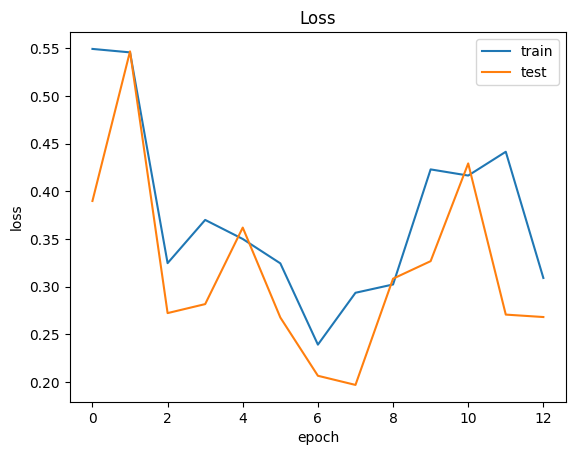

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')

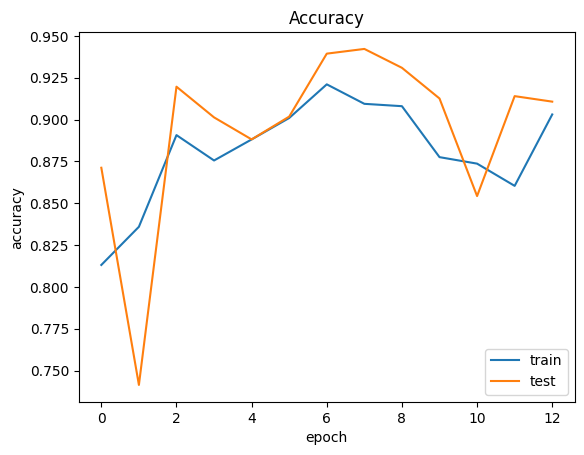

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='lower right')

Making Predictions


In [ ]:
# Read data from walking.csv, creating df, apply sliding windows on data and make prediction
df = pd.read_csv("../data/test/test1.csv")
# df['label'] = 'walking'

X = df.iloc[:, :-1]
y = df['label']

In [ ]:
df.shape

(16184, 10)

In [ ]:
# applying snadradscaler
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
df['label'].count()

16184

In [ ]:
y_test = df['label'].values
print(y_test.shape)

(16184,)


In [ ]:
# Create a sliding window of 10 seconds for the data
window_size = 128
stride = 64

# Generate sequences using sliding windows
sequences = []
labels = []
for i in range(len(X_scaled_df) - window_size):
    window = X_scaled_df[i:i+window_size]
    if len(window) == window_size:
        sequences.append(window)

X_sliding = np.array(sequences)

# Make predictions
y_pred = model.predict(X_sliding)
y_pred = np.argmax(y_pred, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
print("Predicted labels are : ", y_pred)

502/502 [==============================] - 3s 7ms/step
Predicted labels are :  ['climbing' 'climbing' 'climbing' ... 'walking' 'walking' 'walking']


In [ ]:
print(y_test.shape)
print(y_pred.shape)

y_test = y_test[:y_pred.shape[0]]

(16184,)
(16056,)


In [ ]:
# checking testing accuracy
from sklearn.metrics import accuracy_score
print("Testing accuracy is : ", accuracy_score(y_test, y_pred))

Testing accuracy is :  0.9673019431988041


In [ ]:
import pickle

pickle.dump(model, open('../dumpFiles/CNN_model.pkl', 'wb'))
pickle.dump(scaler, open('../dumpFiles/scaler.pkl', 'wb'))
pickle.dump(label_encoder, open('../dumpFiles/label_encoder.pkl', 'wb'))